In [1]:
# Statistics and probability concluding exercise

In [2]:
# Exercise 5.2

In [3]:
# import uniform distribution
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# create a data frame with a bunch of distributions

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import expon
from scipy.stats import poisson
from scipy.stats import binom

df = pd.DataFrame()

n = 10000

df["uniform"]   = uniform.rvs  (size=n, loc=10, scale=20)
df["norm"]      = norm.rvs     (size=n, loc=0, scale=1)
df["gamma"]     = gamma.rvs    (size=n, a=5 )
df["expon"]     = expon.rvs    (size=n, scale=1, loc=0)
df["poisson"]   = poisson.rvs  (size=n, mu=3)
df["binom"]     = binom.rvs    (size=n, n=10, p=0.8)


<AxesSubplot:ylabel='Density'>

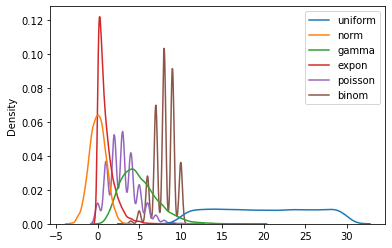

In [5]:
import seaborn as sns


sns.kdeplot(data=df)

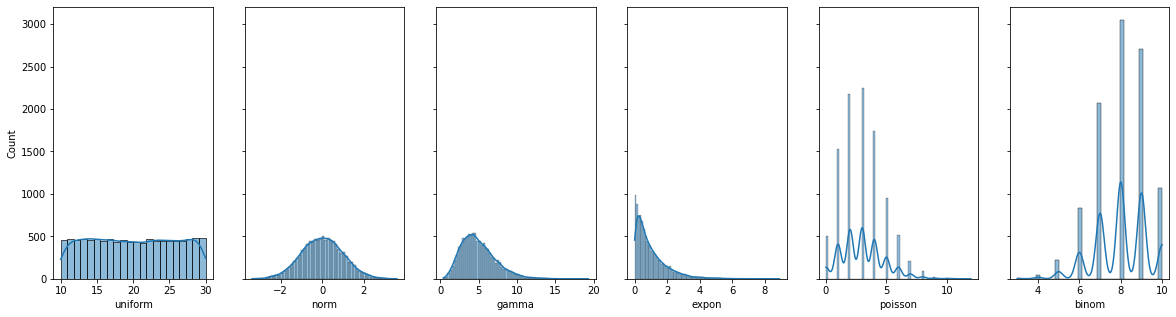

In [6]:
fig, axes = plt.subplots(1, len(df.columns), figsize=(20,5), sharey=True)

for column, ax in zip(df.columns, axes):
    sns.histplot(df[column], ax=ax, kde=True)

In [7]:
nof_samples = 100

# calculate mean of 100 random samples
random_samples_mean = np.mean(df.sample(nof_samples))
random_samples_mean

uniform    19.999818
norm        0.115199
gamma       4.668949
expon       0.903665
poisson     3.080000
binom       7.980000
dtype: float64

In [8]:
def calculate_x_bar(iterations=1000):
    df_bar = pd.DataFrame()

    x_bar = np.zeros(iterations)

    for column in df.columns:
        for i in range(len(x_bar)):
            random_samples = df[column].sample(nof_samples)
            x_bar[i] = np.mean(random_samples)
        # update the df_bar with the 1000 iterations of 100 samples
        df_bar[column] = x_bar

    return df_bar

In [9]:
df_bar = calculate_x_bar(10)

In [10]:
df_bar.head()

,uniform,norm,gamma,expon,poisson,binom
0,19.933207,0.037819,4.886941,1.048972,3.02,8.01
1,19.874542,0.096198,5.348821,1.035322,3.16,8.00
2,20.224736,0.051946,4.653692,1.008401,3.03,7.90
3,19.659825,0.148542,5.120028,0.873860,2.66,8.16
4,20.792012,0.094978,5.092652,1.004949,3.16,8.11


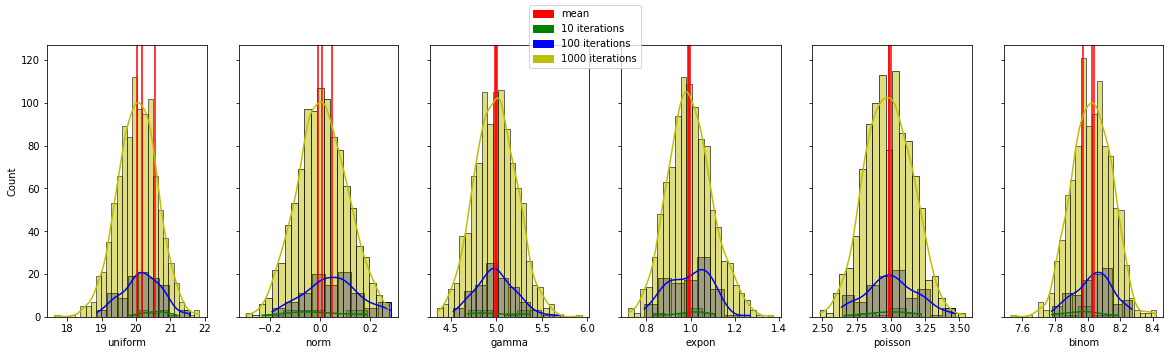

In [39]:
df_bar_list = [calculate_x_bar(10), calculate_x_bar(100), calculate_x_bar(1000)]
hist_color_list = ['g', 'b', 'y']

fig, axes = plt.subplots(1, len(df_bar.columns), figsize=(20,5), sharey=True)

for column, ax in zip(df_bar.columns, axes):
    for df_bar_item, hist_color in zip(df_bar_list, hist_color_list):
        ax.axvline(np.mean(df_bar_item[column]), c='r')
        sns.histplot(df_bar_item[column], ax=ax, kde=True, color=hist_color)


import matplotlib.patches as mpatches
red_patch    = mpatches.Patch(color='r', label='mean')
green_patch  = mpatches.Patch(color='g', label='10 iterations')
blue_patch   = mpatches.Patch(color='b', label='100 iterations')
yellow_patch = mpatches.Patch(color='y', label='1000 iterations')

fig.legend(handles=[red_patch, green_patch, blue_patch, yellow_patch], loc='upper center')
    

In [12]:
# we can see that the more iterations we will make (each time picking 100 samples), we get closer to a normal distribution

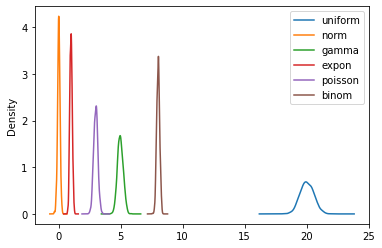

In [13]:
df_bar_1000 = df_bar_list[2]
df_bar_1000.plot.kde();

In [14]:
# https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_bar_scaled = pd.DataFrame(ss.fit_transform(df_bar_1000),columns = df_bar_1000.columns)

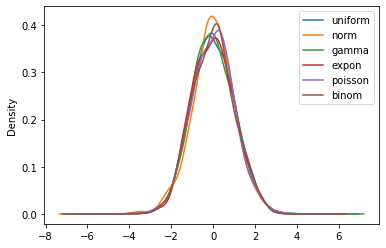

In [15]:
df_bar_scaled.plot.kde();

In [16]:
# plot QQ Plot

import statsmodels.api as sm

In [17]:
def plot_mutiple_qq(data_frame):
    fig, axes = plt.subplots(1, len(data_frame.columns), figsize=(20,5), sharey=True)

    for column, ax in zip(data_frame.columns, axes):
        ax.set_title(column)
        sm.qqplot(data_frame[column], line='r', ax=ax) 

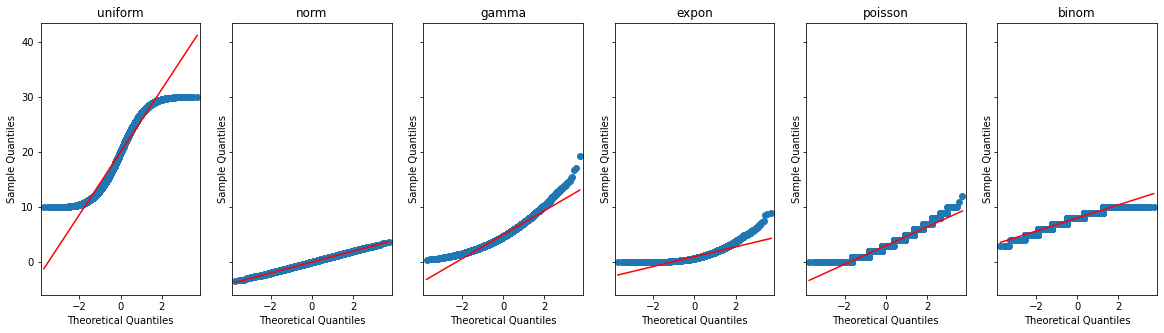

In [18]:
# QQ plot for the original distributions

plot_mutiple_qq(df)

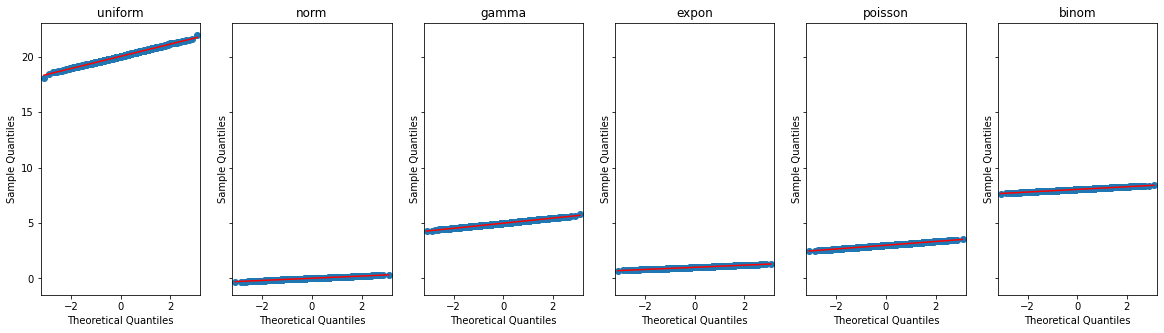

In [19]:
# QQ plot for the means of the distributions (by all means)

plot_mutiple_qq(df_bar_1000)

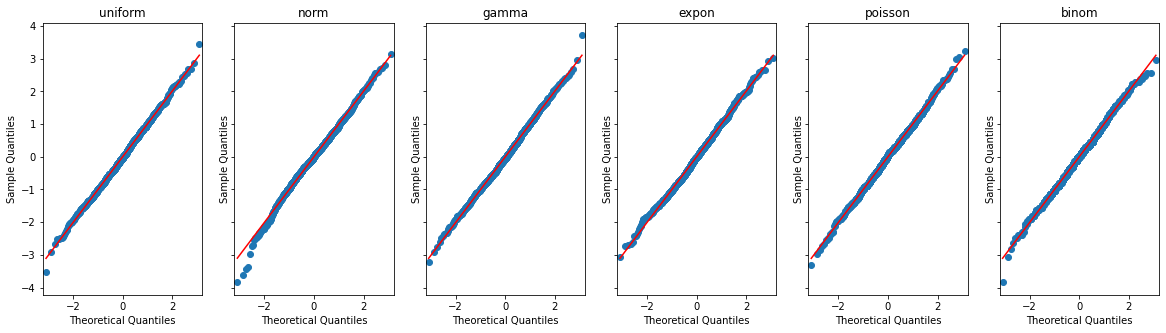

In [20]:
# QQ plot after scaling

plot_mutiple_qq(df_bar_scaled)

In [21]:
# according the CLT,
# The sample averages will converge to the N(0,1) as we take more samples,
# And indeed for n=1000 the distribution of x tilda (normalized x) is closer to the N(0,1).